In [14]:
%matplotlib inline

In [53]:
from hedm import quaternion
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def angle_radius(vec, pole='ND', convention='active'):
    # handle positional arguments
    vec = np.asarray(vec)
    pole = pole.lower()
    # normalize vec
    vec /= np.linalg.norm(vec)
    # set the sample reference frame
    axes = {
        'nd' : np.array([
                [1., 0., 0.],
                [0., 1., 0.],
                [0., 0., 1.]]),
        'rd' : np.array([
                [0., 1., 0.],
                [0., 0., 1.],
                [1., 0., 0]]),
        'td' : np.array([
                [0., 0., 1.],
                [1., 0., 0.],
                [0., 1., 0.]])}[pole]
    axes /= np.linalg.norm(axes, axis=0)
    if convention.lower() == 'passive':
        axes = axes.T
    # determine radius and angle
    right, up, pole = axes
    x = np.dot(vec, right)
    y = np.dot(vec, up)
    z = 1.-np.dot(vec, pole)
    theta = np.arctan2(y, x)
    radius = z
    return (theta, radius)

## Read the data

In [3]:
grains = np.genfromtxt('Grains.csv', skip_header=8, names=True, dtype=None)
grains.dtype.names

('GrainID',
 'O11',
 'O12',
 'O13',
 'O21',
 'O22',
 'O23',
 'O31',
 'O32',
 'O33',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'alpha',
 'beta',
 'gamma',
 'DiffPos',
 'DiffOme',
 'DiffAngle',
 'GrainRadius',
 'Confidence',
 'eFab11',
 'eFab12',
 'eFab13',
 'eFab21',
 'eFab22',
 'eFab23',
 'eFab31',
 'eFab32',
 'eFab33',
 'eKen11',
 'eKen12',
 'eKen13',
 'eKen21',
 'eKen22',
 'eKen23',
 'eKen31',
 'eKen32',
 'eKen33',
 'RMSErrorStrain',
 'PhaseNr')

In [6]:
orientations = grains[np.array([
            'O11', 'O12', 'O13',
            'O21', 'O22', 'O23',
            'O31', 'O32', 'O33'])].view(np.float64).reshape((-1, 3, 3))

# Pole Figures

In [57]:
# transform the orientation matrices to RD/TD/ND
sample_coordinates = np.dot(orientations, [
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0]])
axis_angles = [quaternion.to_axis_angle(quaternion.from_matrix(m)) for m in sample_coordinates]

[array([-0.79532423, -0.25801879,  0.54853046]),
 array([-0.89630749,  0.39602315,  0.19949573]),
 array([ 0.42209873,  0.20429418,  0.88323075])]

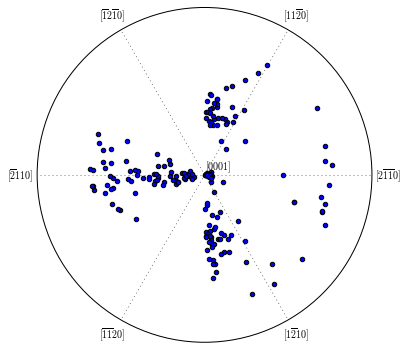

In [69]:
theta, radius = np.transpose([angle_radius(axis) for axis, angle in axis_angles])
fig = plt.figure(figsize=(6,6))
axnd = fig.add_subplot(111, projection='polar')
axnd.scatter(theta, radius)
axnd.set_yticks([0])
axnd.set_yticklabels(['$[0001]$'])
axnd.set_xticks(np.arange(0, 2*np.pi, np.pi/3.))
_ = axnd.set_xticklabels([
        '$[2\overline{1}\overline{1}0]$',
        '$[11\overline{2}0]$',
        '$[\overline{1}2\overline{1}0]$',
        '$[\overline{2}110]$',
        '$[\overline{1}\overline{1}20]$',
        '$[1\overline{2}10]$'
    ])

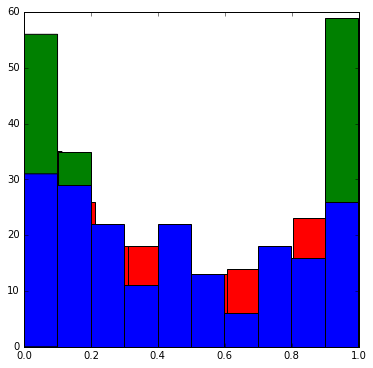

In [72]:
axis = np.array([axis for axis, angle in axis_angles])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.hist(np.abs(axis[:, 0]), color='r')
ax.hist(np.abs(axis[:, 1]), color='g')
ax.hist(np.abs(axis[:, 2]), color='b')
plt.show()